# Data Science notebook example

Welcome! Let's import some data and do some light analysis. Let's talk Pokémon. Pokémon is the history of a homeless preteen who forces his cute-looking slaves to viciously fight for a living. Despite the dark nature of the history, it's made its creators a lot of money, and it's enjoyed by many people around the world. And some nerds have compiled the data in a public github repo!

## Initial stuff

We'll begin by importing the `csv` and  `requests` library and we'll get some data from the repo.

In [1]:
%matplotlib inline

import csv
import requests

CSV_URL = 'https://raw.githubusercontent.com/veekun/pokedex/master/pokedex/data/csv/pokemon.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    content_reader = csv.reader(decoded_content.splitlines(), delimiter=',')
    pokemon_list = list(content_reader)
    # print(pokemon_list)

Now we have a nested array with pokemon properties. Let's just plot some properties against each other.

First we'll need a visualization library. I favor seaborn.

In [2]:
import seaborn

I also like to use `numpy` matrixes rather than pandas datasets.

In [3]:
import numpy as np

I'll put the 150 first Pokémon data into a matrix.

In [1]:
pokemon_matrix = np.array(pokemon_list[0:151])
print(pokemon_matrix)

NameError: name 'np' is not defined

Let's take note of the variable names

In [5]:
variable_names = pokemon_matrix[0,:]
#print(variable_names)

And save the names for later. I might want to add a tooltip or something.

In [6]:
pokemon_names = pokemon_matrix[1:,1]
#print(pokemon_names)

The interesting data is all integers, so we have to take care of setting the dtype correctly:

In [7]:
pokemon_data = np.array(pokemon_matrix[1:,2:], dtype=int)

We can finally plot height vs weight.

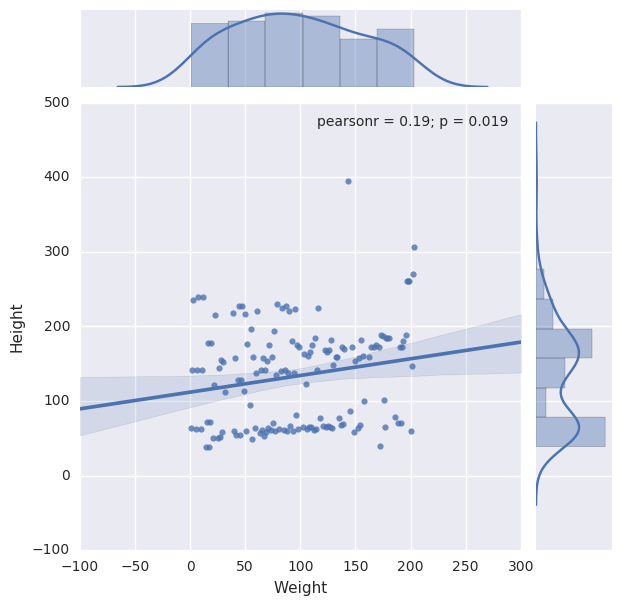

In [8]:
seaborn.jointplot(
    x = pokemon_data[:,4], # weight
    y = pokemon_data[:,3], # height
    kind="reg"
).set_axis_labels("Weight", "Height")